In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('auto-mpg.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
#To find null values in the data
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
# To check the datatypes of the columns
data.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,object
weight,int64
acceleration,float64
model year,int64
origin,int64
car name,object


In [ ]:
#To check for any duplicated rows
data.duplicated().sum()

0

In [ ]:
# To convert the ? in horsepower to NaN
data['horsepower']=pd.to_numeric(data['horsepower'],errors='coerce')
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
data.dropna(inplace=True)
print(data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [ ]:
#To identify the size of dataset after dropping certain rows
data.shape

(392, 9)

In [ ]:
# To identify the datatypes of columns
data.dtypes

,0
mpg,float64
cylinders,int64
displacement,float64
horsepower,float64
weight,int64
acceleration,float64
model year,int64
origin,int64
car name,object


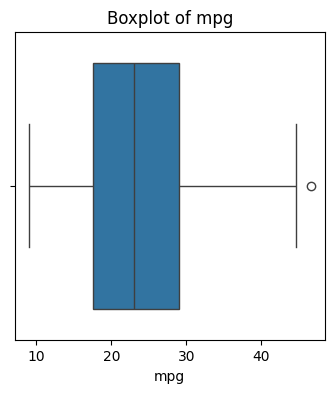

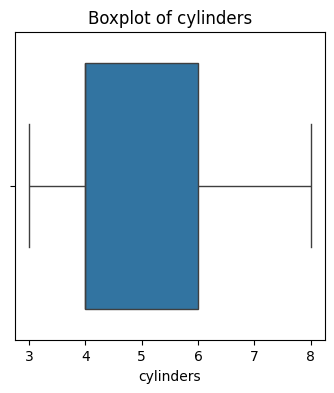

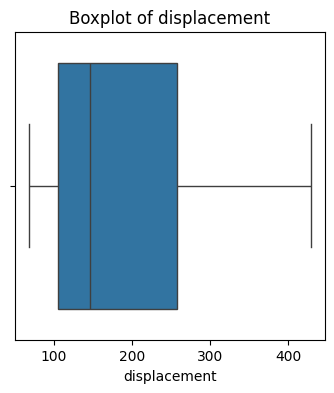

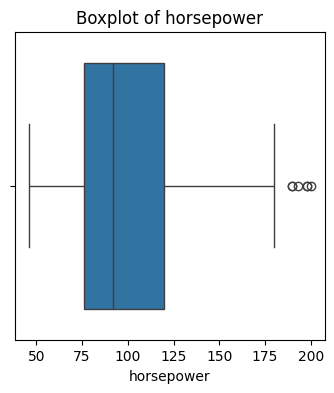

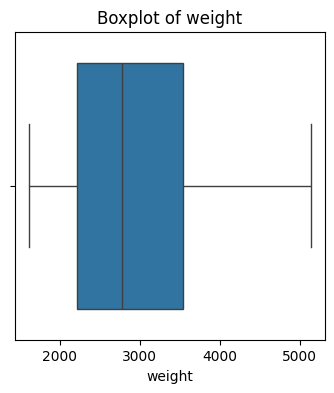

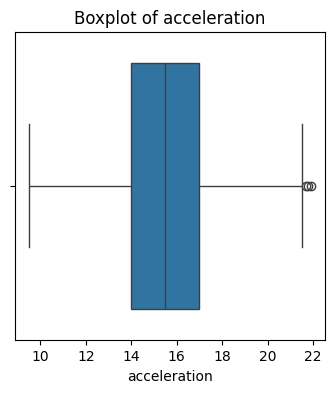

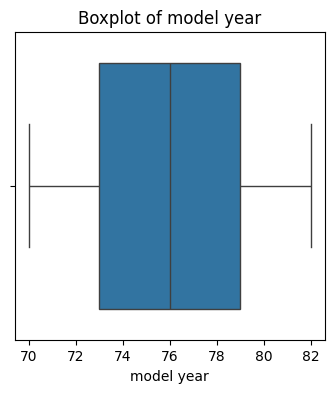

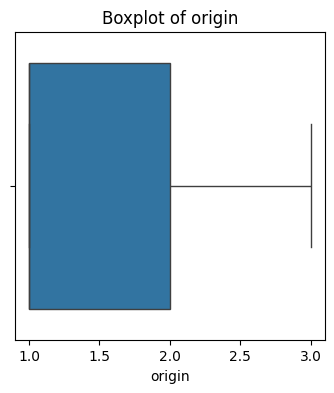

In [ ]:
# Create a separate boxplot for each column (excluding 'car_name' which is not numeric)
for column in data.drop(columns=['car name']).columns:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [ ]:
# Removing outliers(Using interquartile ranges)
def remove_outliers(data,col):
  Q1=data[col].quantile(0.25)
  Q3=data[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1 - 1.5*IQR
  upper_bound=Q3 + 1.5*IQR
  return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

for i in ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']:
  data=remove_outliers(data,i)
print(data)

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
14   24.0          4         113.0        95.0    2372          15.0   
..    ...        ...           ...         ...     ...           ...   
392  27.0          4         151.0        90.0    2950          17.3   
393  27.0          4         140.0        86.0    2790          15.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
2            70       1      

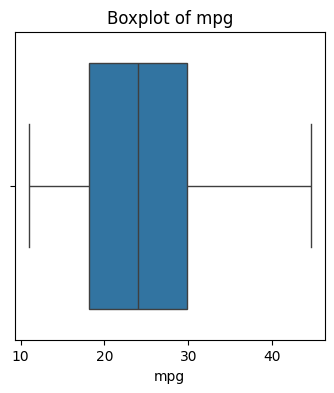

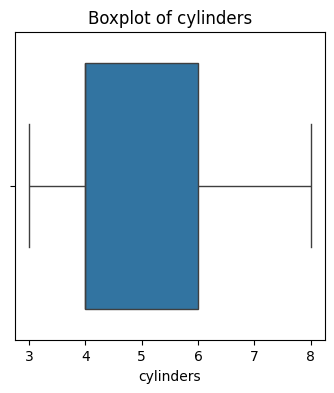

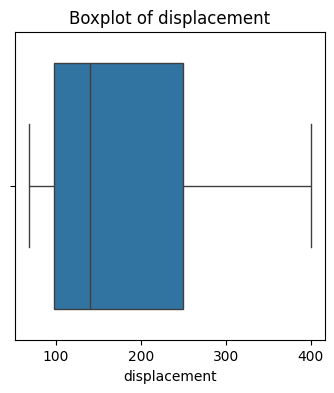

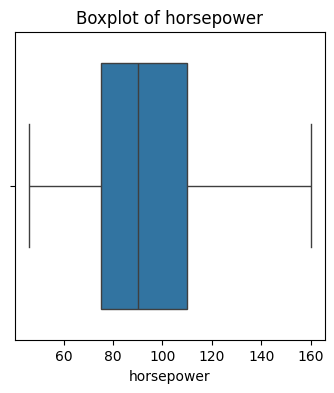

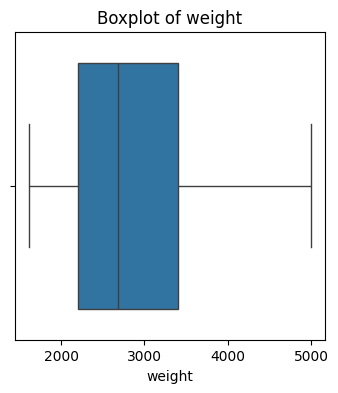

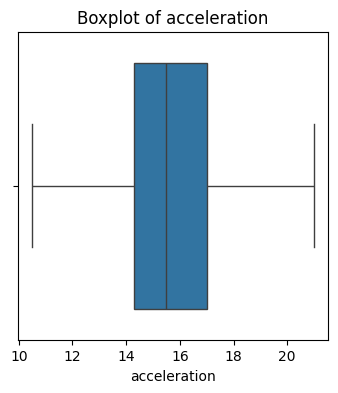

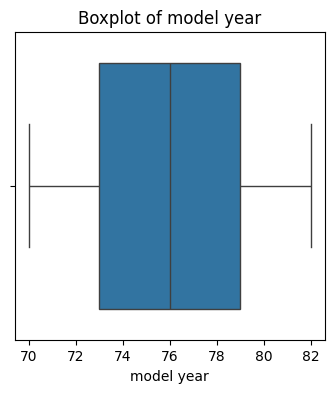

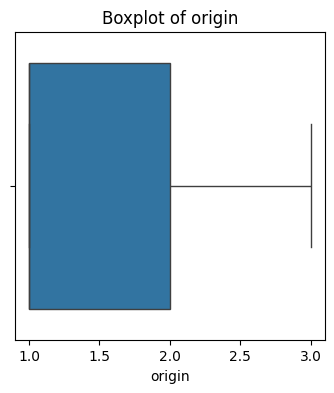

In [ ]:
# Create a separate boxplot for each column (excluding 'car_name' which is not numeric)
for column in data.drop(columns=['car name']).columns:
    plt.figure(figsize=(4, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [ ]:
#To reload the data into data2
data2=pd.read_csv('auto-mpg.csv')
data2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
# To convert ? into NaN in horsepower
data2['horsepower']=pd.to_numeric(data2['horsepower'],errors='coerce')
data2.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
# To fill missing values in horsepower column
data2.fillna(data2['horsepower'].mean(),inplace=True)
data2.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [ ]:
#Capping extreme values(Using 5st and 95th percentiles)
def cap_values(data,col):
  lower_cap=data[col].quantile(0.05)
  upper_cap=data[col].quantile(0.95)
  data[col]=np.clip(data[col],lower_cap,upper_cap)

for i in ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin']:
  cap_values(data2,i)
print(data2)
print("Data Preprocessing complete")

       mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.00          8         307.0      130.00  3504.0        12.000   
1    15.00          8         350.0      165.00  3693.0        11.500   
2    18.00          8         318.0      150.00  3436.0        11.285   
3    16.00          8         304.0      150.00  3433.0        12.000   
4    17.00          8         302.0      140.00  3449.0        11.285   
..     ...        ...           ...         ...     ...           ...   
393  27.00          4         140.0       86.00  2790.0        15.600   
394  37.03          4          97.0       60.85  2130.0        20.415   
395  32.00          4         135.0       84.00  2295.0        11.600   
396  28.00          4         120.0       79.00  2625.0        18.600   
397  31.00          4         119.0       82.00  2720.0        19.400   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70  